# 4 PERSISTENCE ANALYSIS

Many of the variables in empirical asset pricing research are intended to capture persistent characteristics of the entities in the sample. This means that the characteristicof the entity that is captured by the given variable is assumed to remain reasonablystable over time.

The basic approach is to examine the cross-sectional correlation between the given variable measured at two different points in time. If this correlation is high, this indicates that the variable is persistent,

## 4.1 IMPLEMENTATION
Step1: calculate cross-sectional correlations between the given variable X measured a certain number of periods apart

Step2: calculate the time-series average of each of these cross-sectional correlations
### 4.1.1 Periodic Cross-Sectional Persistence
$${\rho}_{(t,t+\tau)}=\frac{\sum_{i=1}^{n_t} [(X_{i,t}-\overline{X}_t)][(X_{i,t+\tau}-\overline{X}_{t+\tau)}]}{\sqrt{\sum_{i=1}^{n_t} (X_{i,t}-\overline{X}_t)^2}\sqrt{\sum_{i=1}^{n_t} (X_{i,t+\tau}-\overline{X}_{t+\tau})^2}}\tag{4.1}$$    
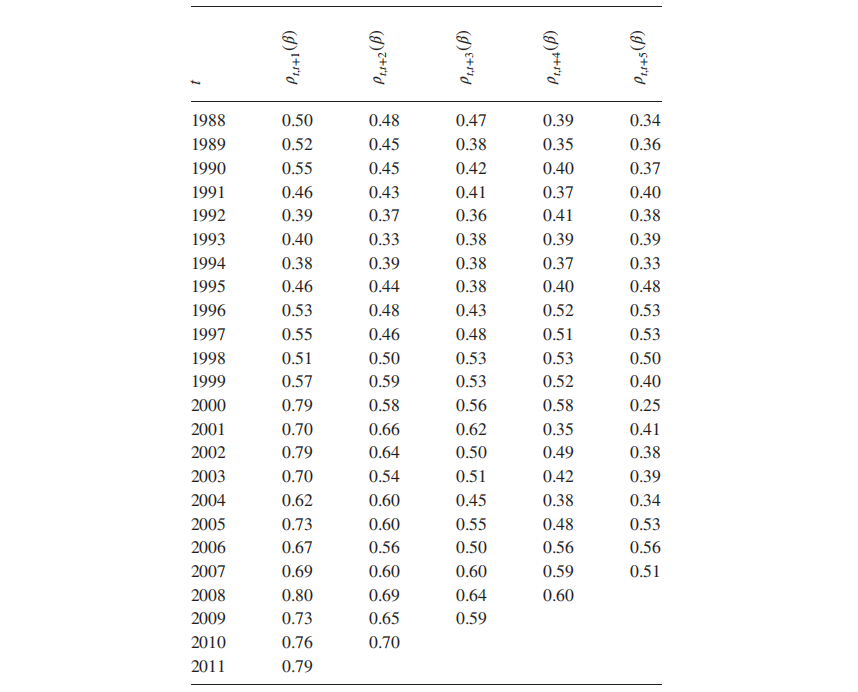

In [1]:
import os
path=os.getcwd()
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

In [2]:
#数据处理
stock = pd.read_csv(os.path.join(path,'data','alldata2021.csv'),engine='python')###github中数据
stock = stock.sort_values(by=['PERMNO','year']).drop_duplicates(subset=['PERMNO','year'])##排序，去除重复数据

###以0.5%的水平缩尾处理
stock['beta'] = winsorize(stock['beta'], limits=[0.0005, 0.0005])
stock['Size'] = winsorize(stock['Size'], limits=[0.0005, 0.0005])
stock['BM'] = winsorize(stock['BM'], limits=[0.0005, 0.0005])

###以股票代码为index，年份为columns，构造三个数据表格
beta = stock.pivot(index='PERMNO', columns='year', values='beta')
size = stock.pivot(index='PERMNO', columns='year', values='Size')
bm = stock.pivot(index='PERMNO', columns='year', values='BM')

In [4]:
##计算自协方差函数
def Persistence_calculator(df):
    corr = df.corr()
    delay_list = ['β_t+1','β_t+2','β_t+3','β_t+4','β_t+5']
    X = pd.DataFrame([],index = df.columns,columns = delay_list)
    for x in range(len(df.columns)-1):
        for y in range(5):
            if x+y < len(df.columns)-1:
                X.iloc[x,y] = corr.iloc[x,x+y+1]
    return X

autocorr_beta = Persistence_calculator(beta)
autocorr_beta = autocorr_beta.applymap(lambda x:round(x, 2))
autocorr_beta

,β_t+1,β_t+2,β_t+3,β_t+4,β_t+5
year,,,,,
1988,0.88,0.34,0.31,0.31,0.24
1989,0.48,0.40,0.32,0.25,0.13
1990,0.79,0.68,0.24,0.13,0.15
1991,0.92,0.65,0.17,0.16,0.19
1992,0.77,0.30,0.17,0.19,0.19
1993,0.50,0.27,0.16,0.16,0.19
1994,0.69,0.48,0.16,0.20,0.20
1995,0.74,0.31,0.20,0.18,0.21
1996,0.58,0.43,0.27,0.30,0.31


### 4.1.2 Average Cross-Sectional Persistence
$$\rho_\tau(X)=\frac{\sum_{t=1}^{N-\tau} \rho_{t,t+\tau}(X)}{N-\tau}\tag{4.2}$$  
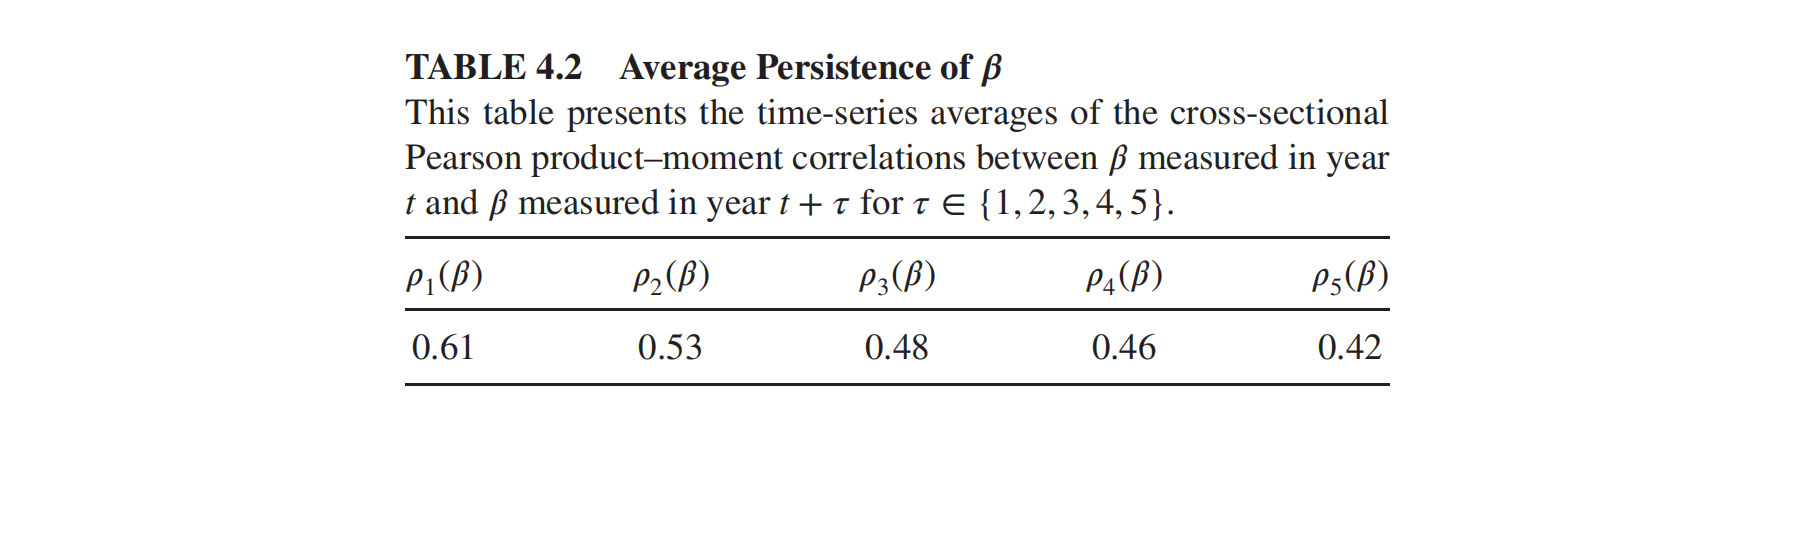

In [9]:
##时间序列均值
def Persistence_calculator_mean(df):
    corr = df.corr()
    delay_list = ['t+1','t+2','t+3','t+4','t+5']
    X = pd.DataFrame([],index = df.columns,columns = delay_list)
    for x in range(len(df.columns)-1):
        for y in range(5):
            if x+y < len(df.columns)-1:
                X.iloc[x,y] = corr.iloc[x,x+y+1]
    mean_df = X.mean()####加上该步即可
    return mean_df

autocorr_beta_mean = Persistence_calculator_mean(beta)
autocorr_beta_mean = autocorr_beta_mean.apply(lambda x:round(x, 2))
autocorr_beta_mean

t+1    0.76
t+2    0.53
t+3    0.33
t+4    0.30
t+5    0.27
dtype: float64

## 4.2 INTERPRETING PERSISTENCE
There are generally two reasons that a variable may exhibit low or zero persistence. The first is that the characteristic being measured is in fact not persistent. The second is that the variable used to proxy for the given characteristic does a poor job at measuring the characteristic under examination.

High values of $\rho_\tau(X)$ indicate that whatever characteristic is being captured by X is in fact persistent.

When $X$ is calculated using $k$ periods of historical data, persistence analysis is only effective when 𝜏 ≥ $k$.

### Determine the optimal calculation period
$$X^1:\tau_1>X^2:\tau_2$$
$\rho_{t,t+\tau_2}(X_2)> \rho_{t,t+\tau_1}(X_1)$: This therefore indicates that using $\tau_2$ periods of data to calculate $X$ provides a more accurate measure of the underlying characteristic than using $\tau_1$ periods, as the additional amount of data used in the calculation apparently overcomes the decay in the persistence at longer lags.

## 4.3 PRESENTING PERSISTENCE
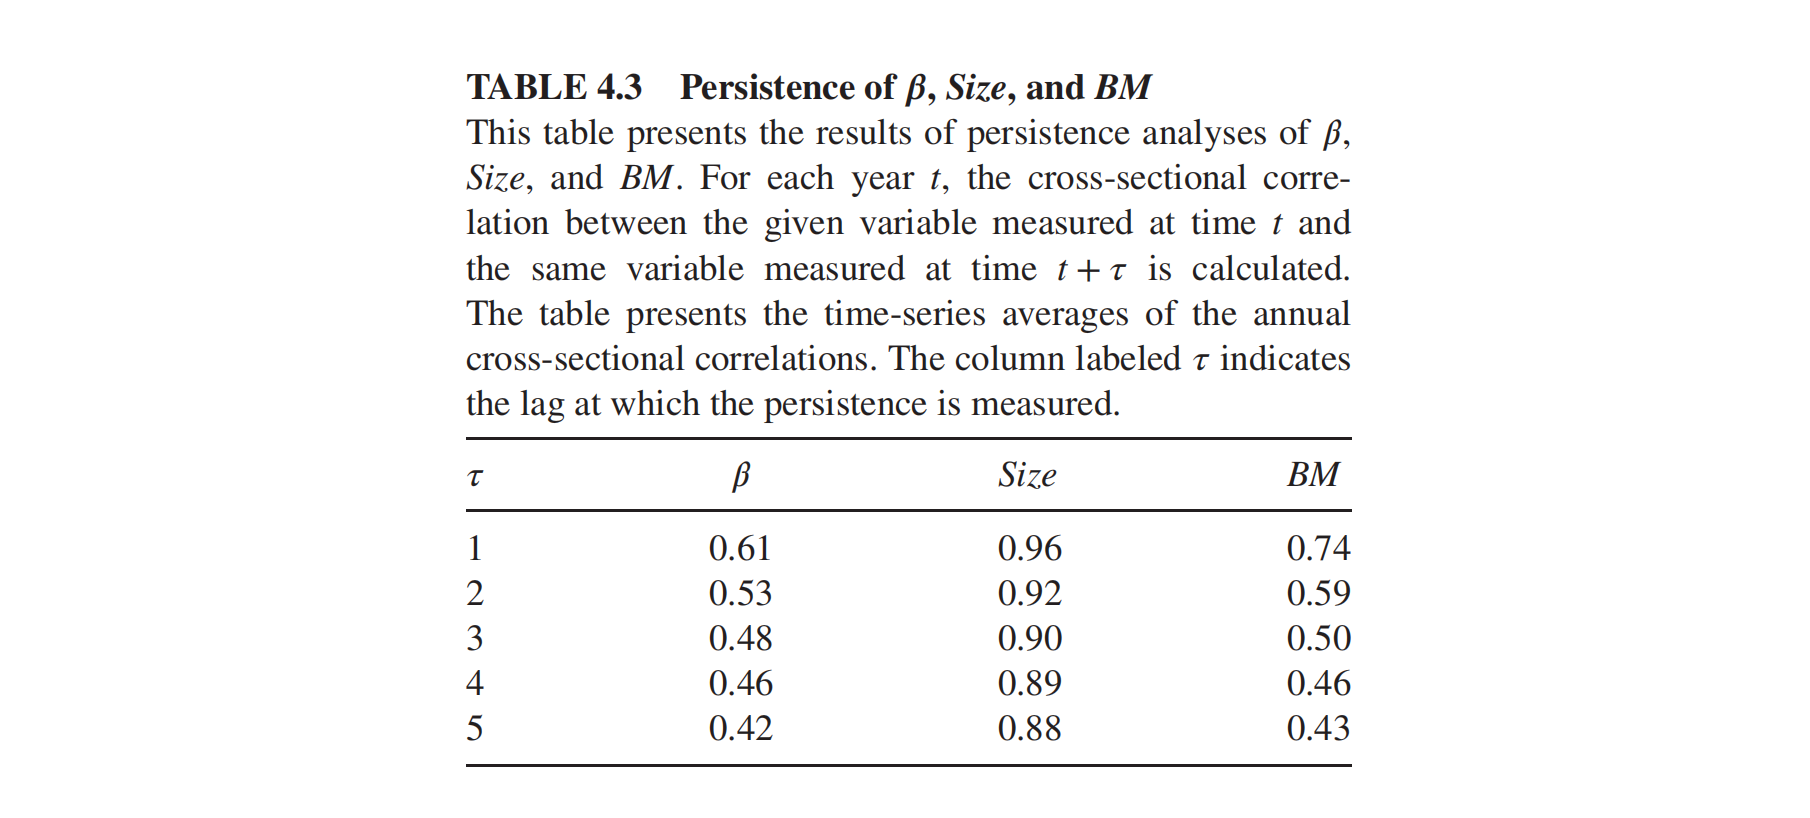

In [10]:
##多组数据结果
def data_autocorr(list_of_data,name_list):
    X = pd.DataFrame()
    for i in list_of_data:
        x = Persistence_calculator_mean(i)
        X = pd.concat([X,x],axis=1)
    X.columns = name_list
    X = X.applymap(lambda x:round(x, 2))
    return X 

df_list = [beta, size, bm]
name_list = ['beta', 'size', 'bm']
table1 = data_autocorr(df_list,name_list) 
table1

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


,beta,size,bm
t+1,0.76,0.96,0.79
t+2,0.53,0.92,0.65
t+3,0.33,0.90,0.57
t+4,0.30,0.89,0.51
t+5,0.27,0.87,0.46


## 4.4 SUMMARY
1.If we assume that the variable accurately measures the characteristic that it is intended to capture, then persistence analysis can be used to examine how persistent the given characteristic is in the cross section of the entities in the sample. 

2.If we assume the characteristic that the variable is intended to measure is in fact persistent, then we can use persistence analysis to examine the accuracy with which the variable captures the given characteristic and the optimal measurement period to use when calculating the variable.